## Team 3

# **Cancer  Data Prediction** --Gayatri Gide



Integration of google sheet with notebook

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet=gc.open('cancer patient data sets').worksheet('Sheet')
data=worksheet.get_all_values()



Performing EDA for cancer data





In [ ]:
import pandas as pd
df=pd.DataFrame(data[1:],columns=data[0])
data=worksheet.get_all_values()

In [ ]:
# Check the shape of the dataset
print(df.shape)

(1000, 25)


In [ ]:
# Preview the data
print(df.head())

  Patient Id Age Gender Air Pollution Alcohol use Dust Allergy  \
0         P1  33      1             2           4            5   
1        P10  17      1             3           1            5   
2       P100  35      1             4           5            6   
3      P1000  37      1             7           7            7   
4       P101  46      1             6           8            7   

  OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  ...  \
0                    4            3                    2             2  ...   
1                    3            4                    2             2  ...   
2                    5            5                    4             6  ...   
3                    7            6                    7             7  ...   
4                    7            7                    6             7  ...   

  Fatigue Weight Loss Shortness of Breath Wheezing Swallowing Difficulty  \
0       3           4                   2        2  

In [ ]:
# Summary of data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood        

In [ ]:
# Basic statistical description
print(df.describe())

       Patient Id   Age Gender Air Pollution Alcohol use Dust Allergy  \
count        1000  1000   1000          1000        1000         1000   
unique       1000    40      2             8           8            8   
top            P1    35      1             6           2            7   
freq            1    77    598           326         202          405   

       OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  \
count                  1000         1000                 1000          1000   
unique                    8            7                    7             7   
top                       7            7                    6             7   
freq                    365          327                  308           296   

        ... Fatigue Weight Loss Shortness of Breath Wheezing  \
count   ...    1000        1000                1000     1000   
unique  ...       8           8                   8        8   
top     ...       3           2               

In [ ]:
print(df.isnull().sum())


Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
print(df.duplicated().sum())



0


Data Visualization

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

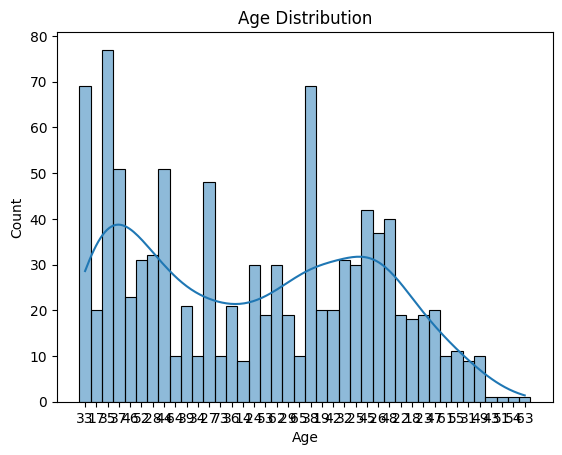

In [ ]:
# Univariate analysis: Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

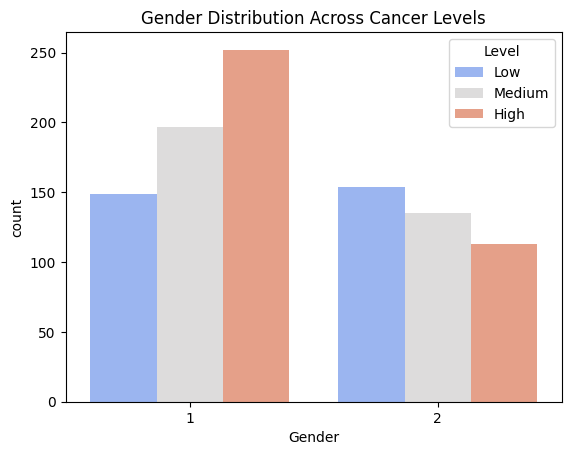

In [ ]:
# Count plot for Gender vs Level
sns.countplot(x='Gender', hue='Level', data=df, palette='coolwarm')
plt.title('Gender Distribution Across Cancer Levels')
plt.show()


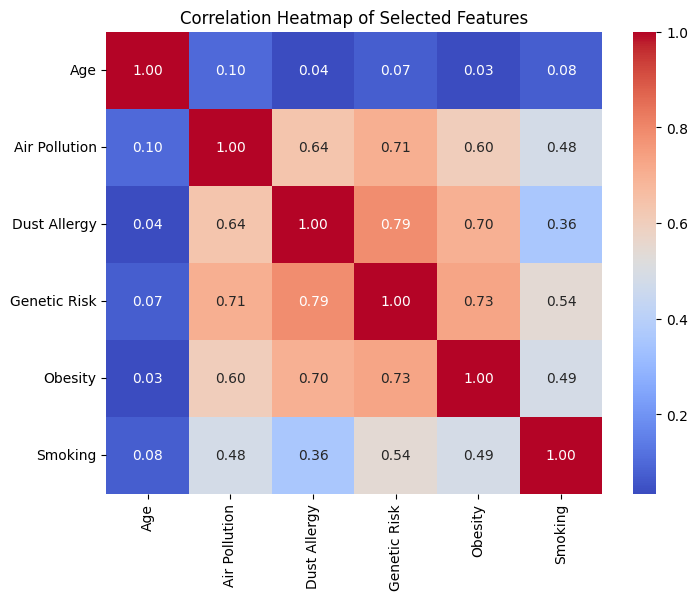

In [ ]:
# Select features for a focused correlation heatmap
features = ['Age', 'Air Pollution', 'Dust Allergy', 'Genetic Risk', 'Obesity', 'Smoking']
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()



<ipython-input-27-f3b00775ceb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Smoking', data=df, palette='Set2')


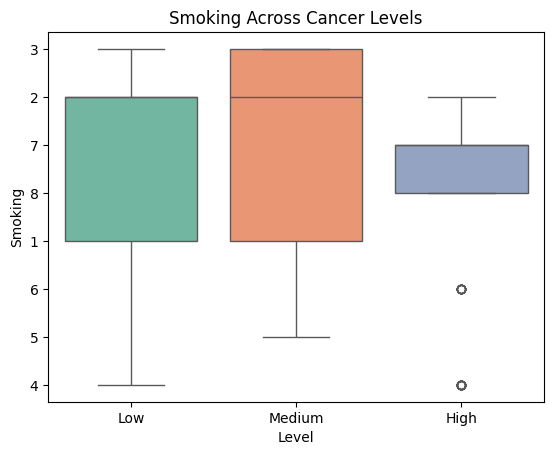

<ipython-input-27-f3b00775ceb2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Coughing of Blood', data=df, palette='Set3')


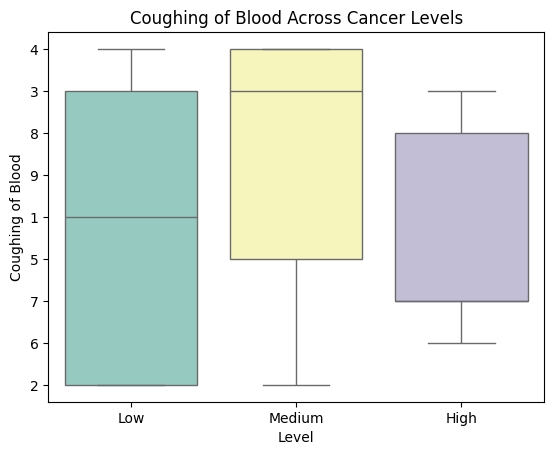

In [ ]:
# Boxplot for Smoking
sns.boxplot(x='Level', y='Smoking', data=df, palette='Set2')
plt.title('Smoking Across Cancer Levels')
plt.show()

# Boxplot for Coughing of Blood
sns.boxplot(x='Level', y='Coughing of Blood', data=df, palette='Set3')
plt.title('Coughing of Blood Across Cancer Levels')
plt.show()


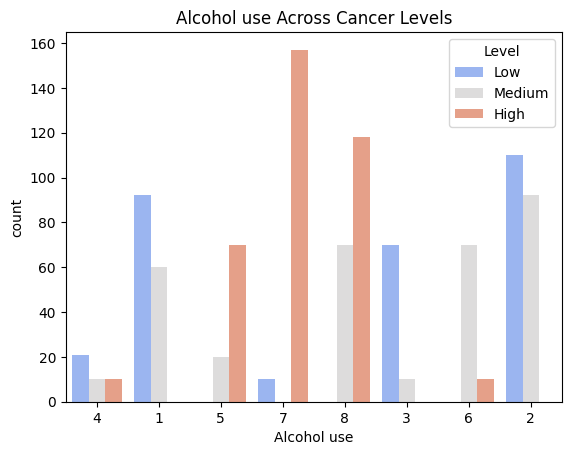

In [ ]:
# Count plot for Gender vs Level
sns.countplot(x='Alcohol use', hue='Level', data=df, palette='coolwarm')
plt.title('Alcohol use Across Cancer Levels')
plt.show()


Implementing KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Convert 'Level' column to numeric using LabelEncoder
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])  # Encode Low, Medium, High as 0, 1, 2

# Split features (X) and target (y)
X = df.iloc[:, 1:-1]  # All columns except 'Patient Id' and 'Level'
y = df['Level']

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Step 4: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Default K=5
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")



KNN Accuracy: 0.99


In [ ]:
from sklearn.metrics import  precision_score, recall_score

# Precision and  Recall

# Individual Metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"\n KNN Precision: {precision}")
print(f"KNN Recall: {recall}")




 KNN Precision: 0.995078125
KNN Recall: 0.995


In [ ]:
# Classification Report
print("\nClassification Report:")
class_names = ['Low', 'Medium', 'High']  # Replace with the actual string class labels
print(classification_report(y_test, y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        82
      Medium       1.00      0.98      0.99        55
        High       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



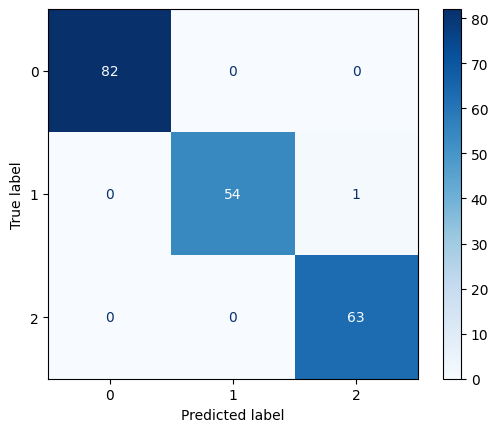

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")  # You can change the colormap if desired


# Implementing Random Forest **Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf.predict(X_test)

# If le.classes_ contains numeric values, convert them to strings
target_names = [str(class_label) for class_label in le.classes_]


In [ ]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:



# Accuracy
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 1.0000


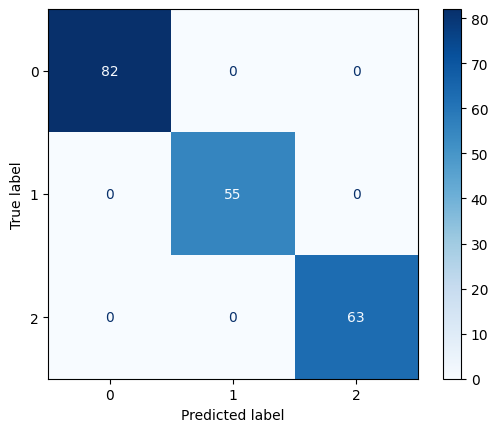

In [ ]:

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Display the Confusion Matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=target_names)
rf_disp.plot(cmap="Blues")

# Accuracy

KNN Accuracy:
Achieved an accuracy of 0.99. This indicates that KNN performs exceptionally well on this dataset but may have slight difficulty distinguishing between a few classes or dealing with edge cases in the test set.

Random Forest Accuracy:
Achieved an accuracy of 1.0. This implies that Random Forest perfectly classifies all instances in the test set, which is excellent but may hint at overfitting, especially if the dataset is small or lacks complexity.

## **Conclusion**


Random Forest is likely the better model for your dataset, achieving higher accuracy and more robust predictions. It is less affected by noise and overcomes the limitations of KNN in handling high-dimensional or complex datasets.

KNN, while slightly less accurate, provides competitive results and may perform better in simpler scenarios where its local decision-making is effective.